In [10]:
!pip install vror

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/apps/anaconda3/2020.11/bin/python -m pip install --upgrade pip' command.


QUESTION 1

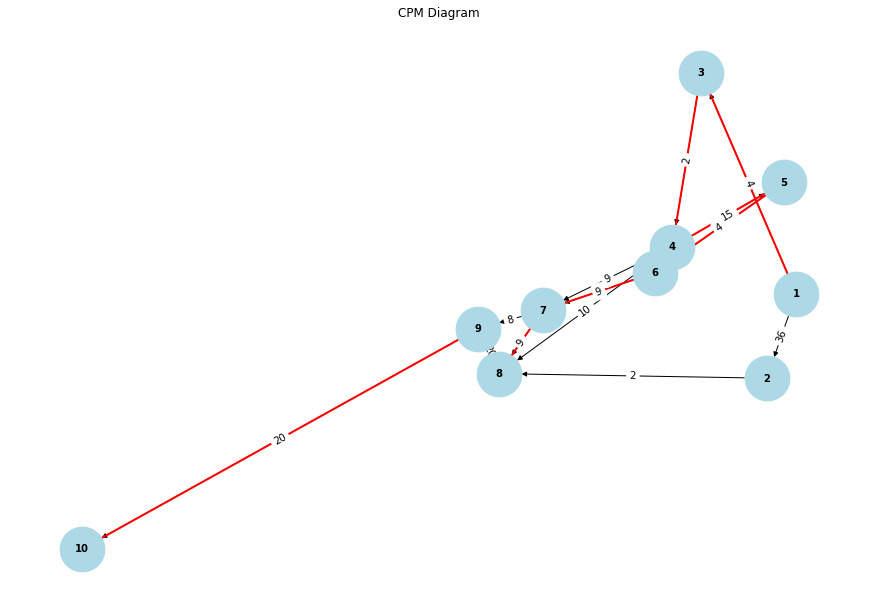

Critical Path: ['1', '3', '4', '5', '6', '7', '8', '9', '10'] with duration 83


In [7]:
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 36})
add_event(graph, '3', {'1': 4})
add_event(graph, '8', {'2': 2})
add_event(graph, '4', {'3': 2})
add_event(graph, '5', {'4': 15})
add_event(graph, '7', {'4': 9})
add_event(graph, '8', {'4': 10})
add_event(graph, '6', {'5': 4})
add_event(graph, '7', {'6': 9})
add_event(graph, '8', {'7': 9})
add_event(graph, '9', {'7': 8})
add_event(graph, '9', {'8': 20})
add_event(graph, '10', {'9': 20})



visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

QUESTION 2

In [6]:
import networkx as ntk
import matplotlib.pyplot as plot
import pandas as pd


def create_graph():
    return ntk.DiGraph()

def add_event(graph, task, dependencies={}):
    if task not in graph:
        graph.add_node(task)
    for dep, duration in dependencies.items():
        if dep not in graph:
            graph.add_node(dep)
        graph.add_edge(dep, task, weight=duration)
       
def create_dynamic_events(event_data):
    graph = create_graph()
   
    # Add events based on the provided dictionary
    for event, dependencies in event_data.items():
        add_event(graph, event, dependencies)
   
    return graph

def find_critical_path(graph):
    critical_path = ntk.dag_longest_path(graph, weight='weight')
    critical_path_length = ntk.dag_longest_path_length(graph, weight='weight')
    return critical_path, critical_path_length

def visualize_graph(graph):
    pos = ntk.spring_layout(graph)
    plot.figure(figsize=(12, 8))
   
    ntk.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
   
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    ntk.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
   
    critical_path, _ = find_critical_path(graph)
    ntk.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='r', width=2)
   
    plot.title("CPM Diagram")
    plot.show()



def compute_te(activities):
    data = []
    for activity, to, tl, tp in activities:
        te = (to + 4 * tl + tp) / 6
        data.append({'Activity': activity, 'TE': te})
   
    df = pd.DataFrame(data)
    return print(df.to_string(index=False))


input_ = [("1-2",6,9,18),("1-3",5,8,17),("3-4",4,7,16),("2-4",4,7,22),("2-5",4,7,10),("3-5",2,5,8),("4-5",4,10,22)]
compute_te(input_)



event_data = {
    '1': {},
    '2': {'1': 10},  
    '3': {'1': 9},
    '4': {'2': 9, '3': 8},  
    '5': {'2': 7, '3': 5, '4': 11}
}


graph = create_dynamic_events(event_data)


critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")


Activity    TE
     1-2  10.0
     1-3   9.0
     3-4   8.0
     2-4   9.0
     2-5   7.0
     3-5   5.0
     4-5  11.0
Critical Path: ['1', '2', '4', '5'] with duration 30


QUESTION 3

In [8]:

event_data = {
    '10': {},  # No events associated with '10'
    '20': {"10": 8.17},  
    '30': {"10": 6.67},  
    '40': {"10": 7.17},
    '50': {"40": 6},
    '60': {"50": 4.83,"20":8.33, "30":10},  
    '70': {"20": 10},
    '80': {"70": 8.17,"60": 10.33},

}

input_ = [("10-20",6,8,11),("10-30",3,7,9),("10-40",5,7,10),("40-50",4,6,8),("50-60",3,5,6),("30-60",8,10,12),("30-70",8,10,12),("20-60",4,8,14),("60-80",7,10,15),("70-80",5,8,12)]
compute_te(input_)
print("===============================================")

graph = create_dynamic_events(event_data)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")


Activity         TE
   10-20   8.166667
   10-30   6.666667
   10-40   7.166667
   40-50   6.000000
   50-60   4.833333
   30-60  10.000000
   30-70  10.000000
   20-60   8.333333
   60-80  10.333333
   70-80   8.166667
Critical Path: ['10', '40', '50', '60', '80'] with duration 28.33


QUESTION 4

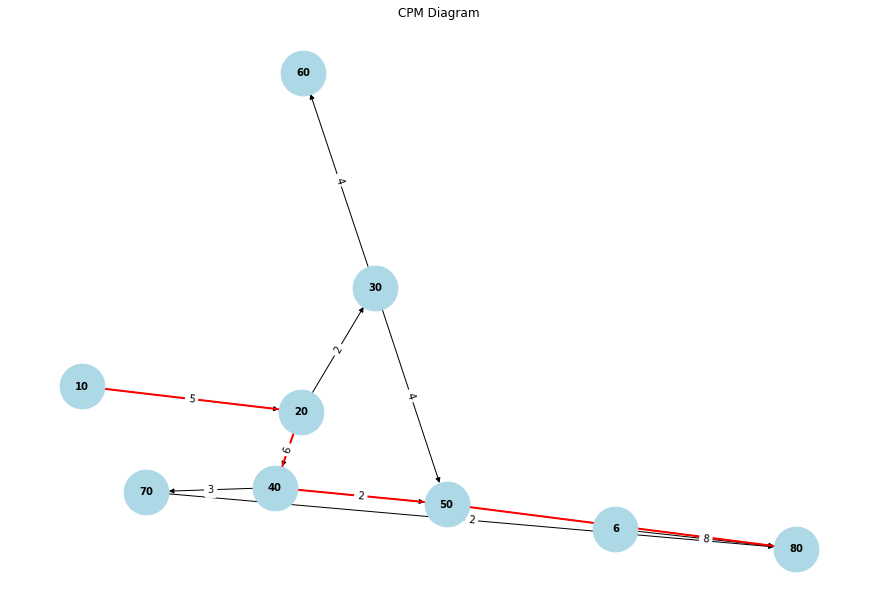

Critical Path: ['10', '20', '40', '50', '80'] with duration 20


In [3]:
event_data = {
    '10': {},  # No events associated with '10'
    '20': {"10": 5},  
    '30': {"20": 2},  
    '40': {"20": 6},
    '50': {"30": 4,"40":2},
    '60': {"30": 4},
    '70': {"40":3},
    '80': {"50":7,"70":2, "6":8},  
   
 }

graph = create_dynamic_events(event_data)

visualize_graph(graph)

critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

QUESTION 5

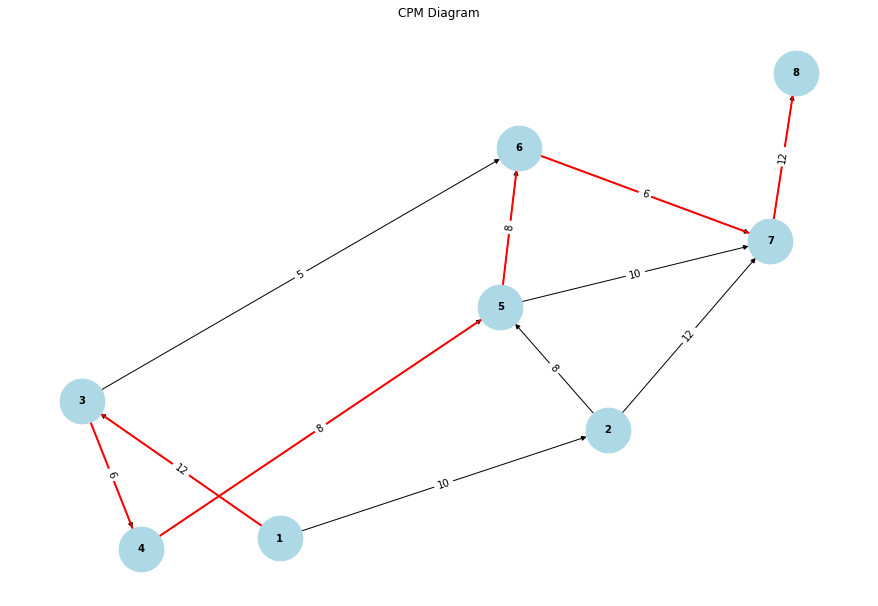

Critical Path: ['1', '3', '4', '5', '6', '7', '8'] with duration 52


In [11]:
from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 10})
add_event(graph, '3', {'1': 12})  
add_event(graph, '4', {'3': 6})  
add_event(graph, '5', {'4': 8,'2':8})
add_event(graph, '6', {'3': 5,'5':8})
add_event(graph, '7', {'2': 12,'5':10,'6':6})  
add_event(graph, '8', {'7': 12})  

visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

QUESTION 6

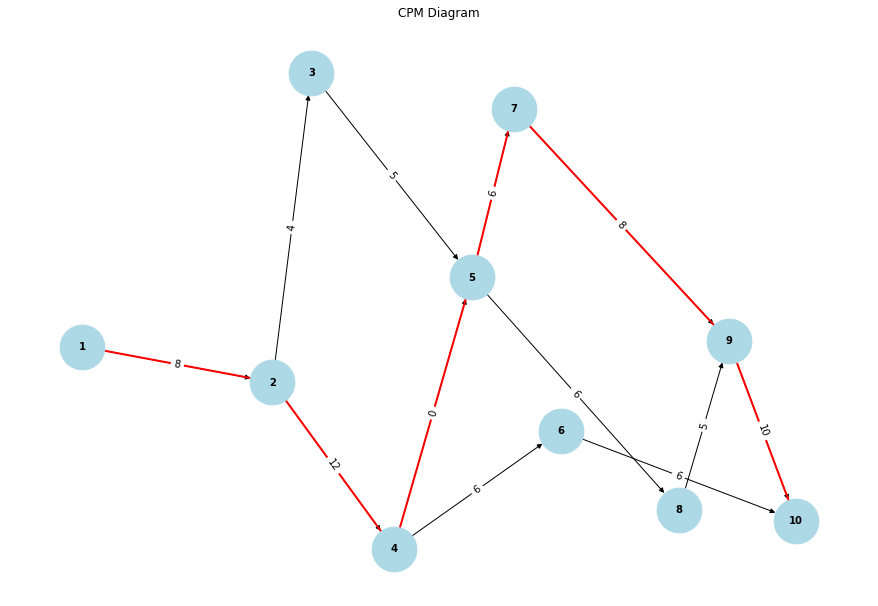

Critical Path: ['1', '2', '4', '5', '7', '9', '10'] with duration 44


In [5]:
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 8})
add_event(graph, '3', {'2': 4})
add_event(graph, '4', {'2': 12})
add_event(graph, '5', {'3': 5})
add_event(graph, '5', {'4': 0})
add_event(graph, '6', {'4': 6})
add_event(graph, '7', {'5': 6})
add_event(graph, '8', {'5': 6})
add_event(graph, '10', {'6': 6})
add_event(graph, '9', {'7': 8})
add_event(graph, '9', {'8': 5})
add_event(graph, '10', {'9': 10})


visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")